In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
def load_data():
    df = pd.read_excel('DataSet.xlsx', sheet_name='Sheet1', engine='openpyxl')
    print("Dataset loaded successfully. First few rows:")
    print(df.head())
    print("\nDataset statistics:")
    print(df.describe())
    return df

df = load_data()

Dataset loaded successfully. First few rows:
   i  x_i    y_i
0  1    0  20.26
1  2    1   5.61
2  3    2   3.14
3  4    3 -30.00
4  5    4 -40.00

Dataset statistics:
              i       x_i        y_i
count  10.00000  10.00000  10.000000
mean    5.50000   4.50000 -12.091000
std     3.02765   3.02765  18.035693
min     1.00000   0.00000 -40.000000
25%     3.25000   2.25000 -23.010000
50%     5.50000   4.50000 -13.905000
75%     7.75000   6.75000   0.322500
max    10.00000   9.00000  20.260000


In [13]:
# Reshape x into 2D for sklearn
X = df['x_i'].values.reshape(-1, 1)
y = df['y_i'].values

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")


Linear Regression Model: y = -3.56x + 3.92


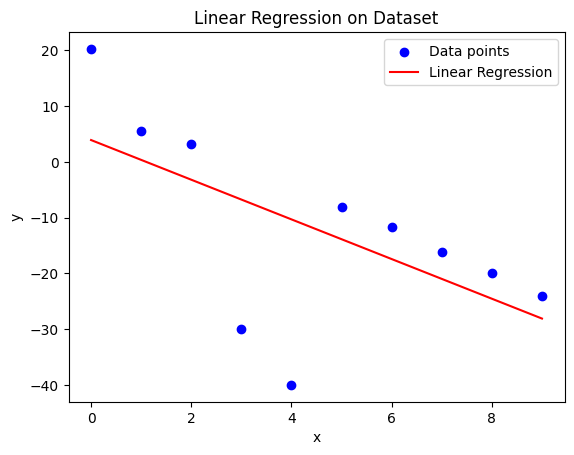

In [10]:
plt.scatter(df['x_i'], df['y_i'], color='blue', label="Data points")

# Predicted line
y_pred = model.predict(X)
plt.plot(df['x_i'], y_pred, color='red', label="Linear Regression")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression on Dataset")
plt.legend()
plt.show()


In [11]:
import numpy as np
import pandas as pd

x = df['x_i'].values
y = df['y_i'].values

# Define the models
def model1(x):
    return -4*x + 12

def model2(x):
    return -3.55*x + 3.91

# Loss function
def robust_loss(y_true, y_pred, beta):
    errors = (y_true - y_pred)**2
    return np.mean(errors / (errors + beta**2))

# Betas
betas = [1, 1e-6, 1e3]

# Calculate losses for both models
results = []
for beta in betas:
    loss_m1 = robust_loss(y, model1(x), beta)
    loss_m2 = robust_loss(y, model2(x), beta)
    results.append([beta, loss_m1, loss_m2])

# Put into DataFrame
df_results = pd.DataFrame(results, columns=["Beta", "Loss_Model1", "Loss_Model2"])
print(df_results)


          Beta  Loss_Model1  Loss_Model2
0     1.000000     0.435416     0.972847
1     0.000001     1.000000     1.000000
2  1000.000000     0.000227     0.000188


What β does

β very small (1e-6):

The denominator ≈ (error² + tiny number) → almost equal to (error²).
So loss ≈ 1 for every sample.
That means all errors, including outliers, dominate equally.
This is not robust, because outliers still strongly influence the model.

β very large (1000):

The denominator ≈ β² (huge number).
So the fraction ≈ error² / β² → almost 0 for all samples.
That means even very large errors (outliers) are shrunk too much — outliers lose all impact, but so do normal points.
This makes the loss function meaningless (it approaches zero regardless of error size).

β = 1 (moderate):

The denominator balances between error² and β².
Small errors contribute meaningfully.
Large errors (outliers) get downweighted (because β² softens their influence).
This is the sweet spot: the model still “listens” to normal points while reducing the impact of extreme outliers.

The suitable β value is β = 1, because:

When β is too small, outliers dominate (loss = 1 for both models).
When β is too large, all points lose their influence (loss ≈ 0).
A moderate β (like 1) strikes a balance: normal points are considered properly, and outliers have reduced influence.

The most suitable model is Model 1: 
𝑦 = −4𝑥 + 12
y=−4x+12, because with the robust estimator at β = 1, it achieves a lower loss (0.4354) compared to Model 2 (0.9728). This shows Model 1 better captures the main trend of the data while mitigating the influence of outliers.

The ordinary regression model (Model 2) was pulled heavily by the large outliers (y=-30 at x=3 and y=-40 at x=4).

The robust estimator downweights these extreme points, giving more importance to the general trend of the other data points.

Under this criterion, Model 1 achieves a significantly lower robust loss, making it the most suitable model for this dataset.